# <center>Customer Revenue & Segmentation Analysis </center>

### Importing Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



### Load Data & Inspict

In [120]:
df = pd.read_csv("fake_customer_data_with_errors.csv")

In [121]:
df.sample(10)

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M
157,CUST1157,Ahmed Ali,89.0,Female,ahmed.ali@hotmail.com,NaN,660.07,2023-04-21,Toys,1.0,NaN,Female
436,CUST1436,Lina Ibrahim,200.0,female,lina.ibrahim@gmail.com,987654321.0,965.04,2024-07-04,NaN,2.0,NaN,female
1232,CUST2232,Lina Mahmoud,-1.0,female,lina.mahmoud@yahoo.com,NaN,864.48,2023-02-16,Toys,5.0,NaN,female
424,CUST1424,John Ali,80.0,M,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0,NaN,M
1543,CUST2543,Ahmed Gaber,-1.0,female,ahmed.gaber@yahoo.com,NaN,118.05,2025-02-25,Toys,NaN,NaN,female
1254,CUST2254,Fatma Hassan,200.0,female,fatma.hassan@gmail.com,987654321.0,244.38,2025-02-14,Books,1.0,NaN,female
1895,CUST2895,Ahmed Ali,200.0,M,ahmed.ali@gmail.com,NaN,369.53,2024-05-12,Books,5.0,NaN,M
554,CUST1554,Sara Gaber,57.0,F,sara.gaber@hotmail.com,NaN,502.53,2025-06-21,NaN,3.0,NaN,F
55,CUST1055,Sara Hassan,200.0,M,sara.hassan@yahoo.com,987654321.0,887.67,2024-11-17,Books,1.0,NaN,M


In [122]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   str    
 1   Name             2150 non-null   str    
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   str    
 4   Email            2150 non-null   str    
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   str    
 8   ProductCategory  1573 non-null   str    
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   str    
dtypes: float64(5), str(7)
memory usage: 201.7 KB


In [123]:
df["PurchaseAmount"].describe()

count    2049.000000
mean      509.418882
std       288.257697
min         5.060000
25%       263.680000
50%       519.250000
75%       762.910000
max       999.560000
Name: PurchaseAmount, dtype: float64

In [124]:
df.rename(columns={"  Gender  ": 'Duplecolumns'}, inplace=True)

last two feature are not helpfull so we remove it and data types for some feature are not correct based on real data
- > reomve unnamed , Gender features 
- > change data type for [Age, Phone, PurchaseDate]

### Clean Data

In [125]:
df.drop(columns=["Unnamed", "Duplecolumns"], inplace = True)

In [126]:
round(df.isna().sum() / len(df) * 100, 3)

CustomerID          0.000
Name                0.000
Age                24.186
Gender             12.698
Email               0.000
Phone              50.140
PurchaseAmount      4.698
PurchaseDate        0.000
ProductCategory    26.837
Rating             15.302
dtype: float64

> Phone --> feature more than 50% missing data so we remove it 

In [127]:
df.drop(columns='Phone', inplace=True)

In [128]:
df.dropna(how="all", inplace=True)

<Axes: ylabel='PurchaseAmount'>

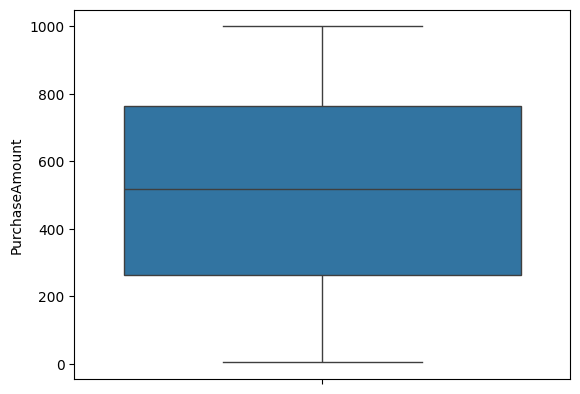

In [129]:
sns.boxplot(df["PurchaseAmount"])

> not found outlier value in PurchaseAmount feature so we can fill missing value with mean

In [130]:
mean_amount = df["PurchaseAmount"].mean()
df["PurchaseAmount"] = df["PurchaseAmount"].fillna(mean_amount)

In [131]:
df.isna().sum()

CustomerID           0
Name                 0
Age                520
Gender             273
Email                0
PurchaseAmount       0
PurchaseDate         0
ProductCategory    577
Rating             329
dtype: int64

In [132]:
df["Gender"].unique()

<StringArray>
[nan, 'Female', 'male', 'F', 'M', 'female', 'Male']
Length: 7, dtype: str

In [133]:
df["Gender"] = df["Gender"].replace({"Female": 'F', "male": 'M', "female": 'F', "Male": 'M'}, inplace=True)

In [134]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [136]:
df.isna().sum()/ len(df)

CustomerID         0.000000
Name               0.000000
Age                0.241860
Gender             0.000000
Email              0.000000
PurchaseAmount     0.000000
PurchaseDate       0.000000
ProductCategory    0.268372
Rating             0.153023
dtype: float64

In [137]:
df["Age"] = df["Age"].fillna(-1)

In [138]:
df["ProductCategory"] = df["ProductCategory"].fillna("Unkwon")

In [141]:
df.isna().sum()/ len(df)

CustomerID         0.000000
Name               0.000000
Age                0.000000
Gender             0.000000
Email              0.000000
PurchaseAmount     0.000000
PurchaseDate       0.000000
ProductCategory    0.000000
Rating             0.153023
dtype: float64

In [147]:
df["Rating"] = df.groupby(["Age"])["Rating"].transform(lambda x : x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

- > we found feature age is found data -1 so we replace it with mean of feature

In [167]:
df["Age"] = df["Age"].apply(lambda x : df["Age"].mean() if x < 0 else x)

> artifacts in age we found some value longer than 100 so we replace this value with nan and fill it with median

In [171]:
df.loc[df["Age"] > 100, "Age"] = np.nan

In [178]:
df["Age"]= df["Age"].fillna(df["Age"].median())

In [174]:
df["Age"].value_counts()

Age
64.311905    1059
72.000000      11
49.000000      11
63.000000      11
50.000000      11
             ... 
33.000000       3
19.000000       3
52.000000       3
24.000000       3
20.000000       3
Name: count, Length: 77, dtype: int64

In [149]:
round(df.isna().sum()/ len(df)*100, 4)

CustomerID         0.0
Name               0.0
Age                0.0
Gender             0.0
Email              0.0
PurchaseAmount     0.0
PurchaseDate       0.0
ProductCategory    0.0
Rating             0.0
dtype: float64

In [150]:
df.duplicated().sum()

np.int64(50)

In [151]:
df.drop_duplicates(inplace = True, keep='first')

### formating and change type features

In [152]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2100 non-null   str    
 1   Name             2100 non-null   str    
 2   Age              2100 non-null   float64
 3   Gender           2100 non-null   str    
 4   Email            2100 non-null   str    
 5   PurchaseAmount   2100 non-null   float64
 6   PurchaseDate     2100 non-null   str    
 7   ProductCategory  2100 non-null   str    
 8   Rating           2100 non-null   float64
dtypes: float64(3), str(6)
memory usage: 147.8 KB


- > Age           --> change it to int 
- > PurchaseDate  --> change it to date 
- > Rating        --> change it to int

In [179]:
df = df.astype({"Age": int, "Rating": int})

In [164]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors='coerce')

In [189]:
df["PurchaseDate"] = df["PurchaseDate"].fillna(df["PurchaseDate"].mean())

In [190]:
df["PurchaseDate"].isna().sum()

np.int64(0)

> **outlier --> we not found outlier**

### **Exploratory Data Analysis**

In [197]:
## who is spend the max PurchaseAmount 

df.sort_values(by="PurchaseAmount", ascending= False).head(5)

,CustomerID,Name,Age,Gender,Email,PurchaseAmount,PurchaseDate,ProductCategory,Rating
687,CUST1687,Alaa Ibrahim,64,F,alaa.ibrahim@yahoo.com,999.56,2025-05-16,Electronics,1
1949,CUST2949,Fatma Mahmoud,63,F,fatma.mahmoud@yahoo.com,999.30,2024-04-10,Clothing,3
424,CUST1424,John Ali,80,M,john.ali@gmail.com,999.23,2024-06-30,Toys,5
1832,CUST2832,John Ali,49,M,john.ali@yahoo.com,999.00,2024-10-10,Toys,1
1961,CUST2961,Mark Mahmoud,64,M,mark.mahmoud@yahoo.com,998.59,2025-04-25,Electronics,2


In [ ]:
## what is most PurchaseAmount for gender what ProductCategory they buy it 

df.pivot_table(index=["Gender"], columns=["ProductCategory"], values=["PurchaseAmount"], aggfunc='sum')

PurchaseAmount                                            \
ProductCategory          Books      Clothing   Electronics          Home   
Gender                                                                     
F                 67987.432177  80098.513294  72177.475530  52539.494412   
M                 87699.405530  92936.006589  89645.898824  95616.345530   

                                              
ProductCategory          Toys         Unkwon  
Gender                                        
F                71373.996589  120196.756589  
M                79689.272177  160777.484353

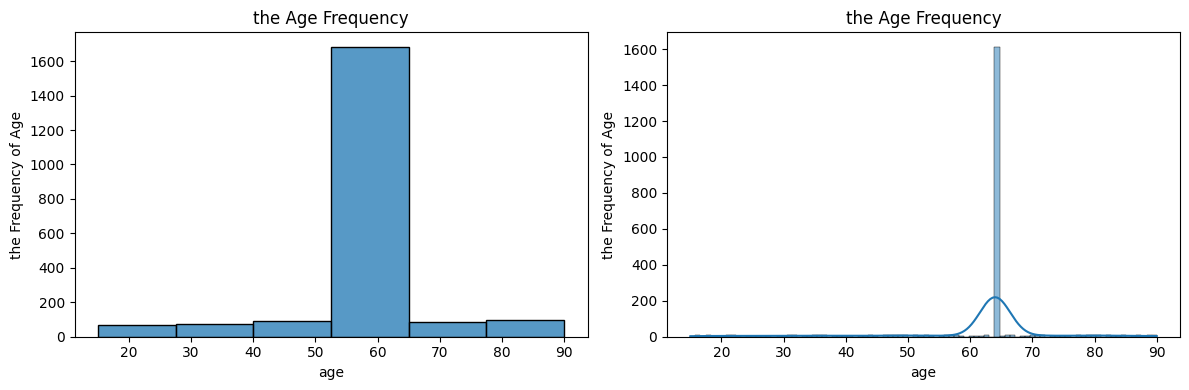

In [207]:
## What is most customer age we deal with them

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['Age'], bins=6)
plt.title("the Age Frequency")
plt.xlabel("age")
plt.ylabel("the Frequency of Age")

plt.subplot(1,2,2)
sns.histplot(df['Age'], kde=True)
plt.title("the Age Frequency")
plt.xlabel("age")
plt.ylabel("the Frequency of Age")
plt.tight_layout()
plt.show()

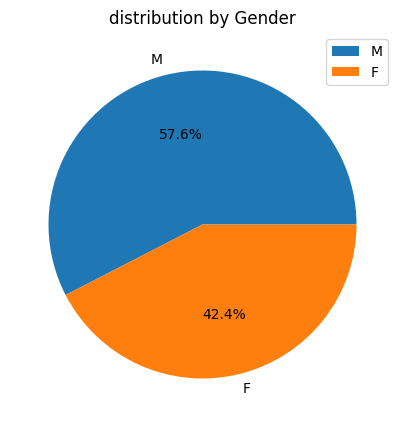

In [224]:
## what is most customer gender we have

coun_value = df["Gender"].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(coun_value, labels=coun_value.index , autopct='%1.1f%%', startangle=0)
plt.title("distribution by Gender")
plt.legend()
plt.show()


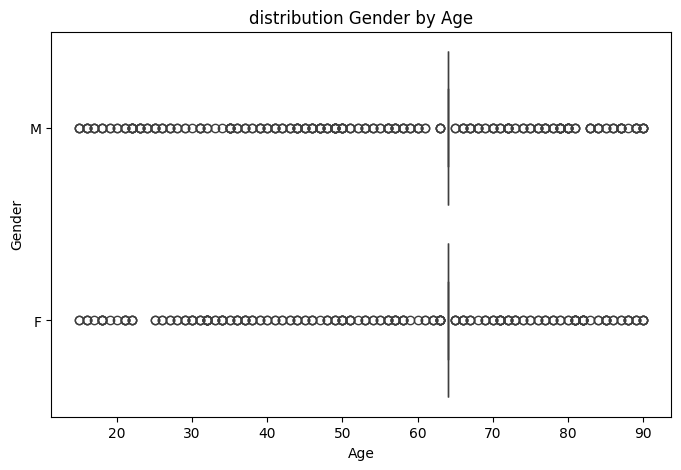

In [231]:
## what is distribution age by gender

plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = 'Age', y = 'Gender')
plt.title("distribution Gender by Age")
plt.show()

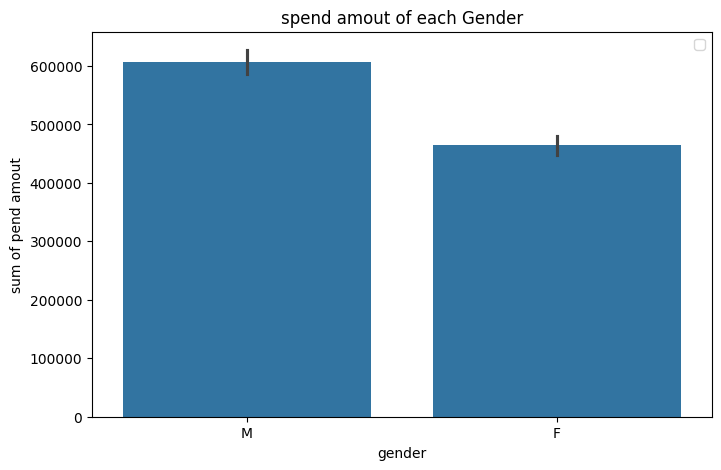

In [233]:
## what is spend amout of each Gender

plt.figure(figsize=(8, 5))
sns.barplot(data = df, x = 'Gender', y = 'PurchaseAmount', estimator='sum')
plt.title("spend amout of each Gender")
plt.xlabel("gender")
plt.ylabel("sum of pend amout")
plt.legend()
plt.show()

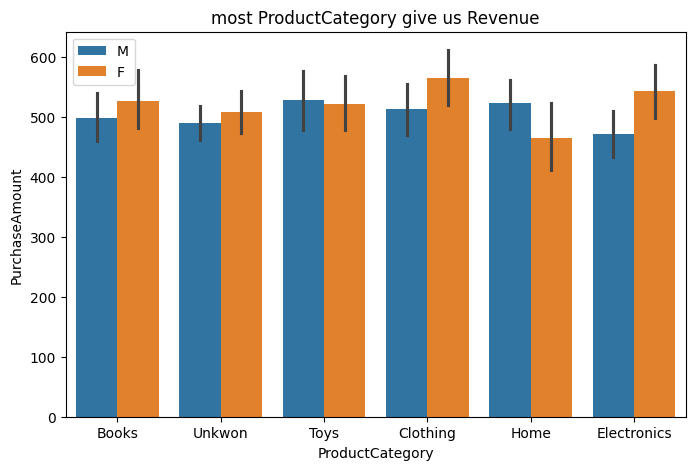

In [242]:
## what is most ProductCategory the gender spend PurchaseAmount

plt.figure(figsize=(8, 5))
sns.barplot(data = df, x='ProductCategory', y = 'PurchaseAmount', hue='Gender')
plt.title("most ProductCategory give us Revenue")
plt.xlabel("ProductCategory")
plt.ylabel("PurchaseAmount")
plt.legend()
plt.show()

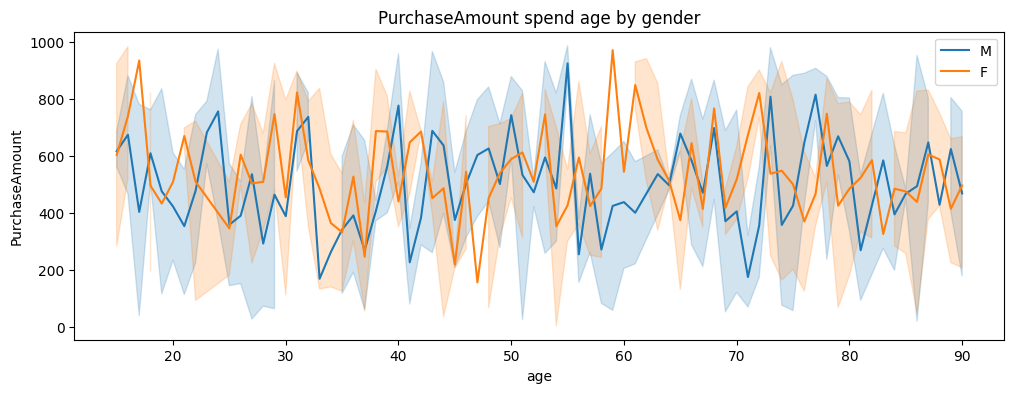

In [238]:
## what is PurchaseAmount spend age by gender 

plt.figure(figsize=(12, 4))
sns.lineplot(data = df, x = 'Age', y = 'PurchaseAmount', hue="Gender")
plt.title("PurchaseAmount spend age by gender")
plt.xlabel("age")
plt.ylabel("PurchaseAmount")
plt.legend()
plt.show()

### **Time Series Analysis**

In [243]:
df["month"] = df["PurchaseDate"].dt.month
df["year"] = df["PurchaseDate"].dt.year

In [246]:
newdf = df

In [247]:
newdf.set_index(newdf["PurchaseDate"], inplace=True)

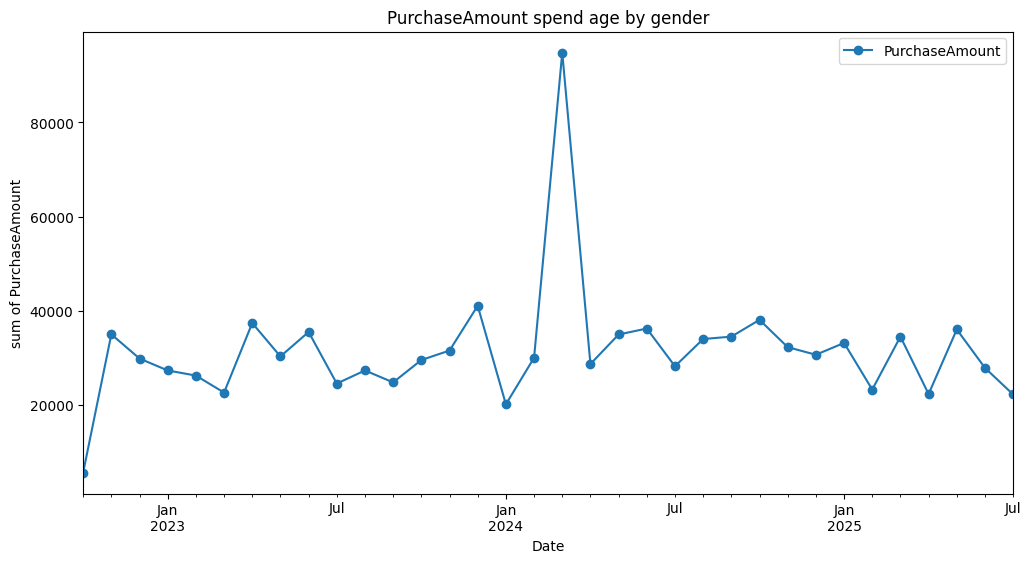

In [269]:
plt.figure(figsize=(12, 6))
year = newdf.groupby(newdf["PurchaseDate"])["PurchaseAmount"].sum()
year.resample("ME").sum().plot(kind='line', marker = 'o')
plt.title("PurchaseAmount spend age by gender")
plt.xlabel("Date")
plt.ylabel("sum of PurchaseAmount")
plt.legend()
plt.show()

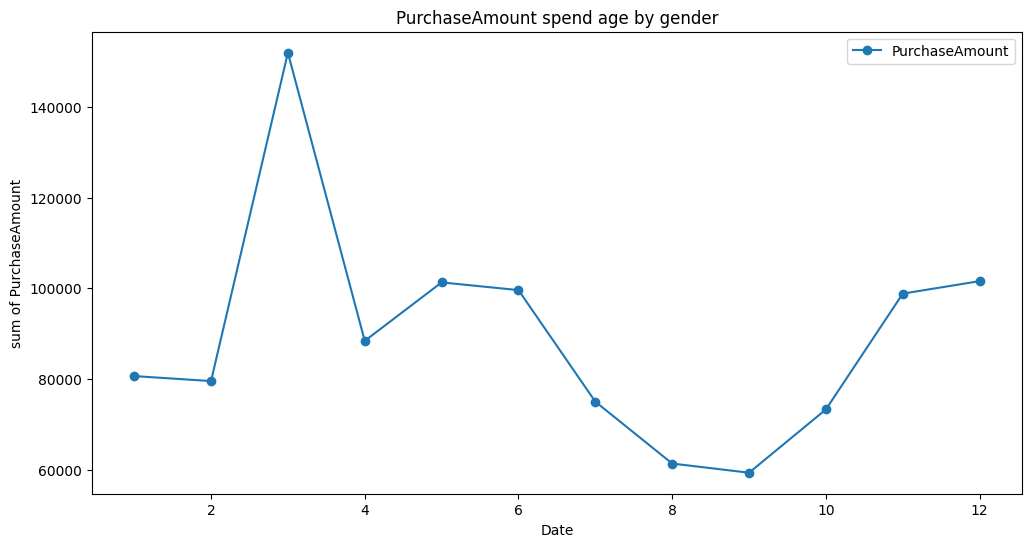

In [ ]:
## what is most month customer buy 

plt.figure(figsize=(12, 6))
month_data = newdf.groupby(newdf["month"])["PurchaseAmount"].sum()
month_data.plot(kind='line', marker = 'o')
plt.title("PurchaseAmount spend age by gender")
plt.xlabel("Month")
plt.ylabel("sum of PurchaseAmount")
plt.legend()
plt.show()